In [1]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [2]:
# Sentiment Analysis with CRISP-DM Methodology in Colab

## Business Understanding
# This project aims to build a sentiment analysis model to classify tweets into `negative`, `neutral`, and `positive` sentiments. The model will demonstrate the CRISP-DM methodology.

# Libraries and Dependencies
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
import gradio as gr

In [11]:
# Data Upload
negative_tweets = pd.read_csv('Negative tweets.csv', encoding='ISO-8859-1')
neutral_tweets = pd.read_csv('Neutral tweets.csv', encoding='ISO-8859-1')
positive_tweets = pd.read_csv('Positive tweets.csv', encoding='ISO-8859-1')




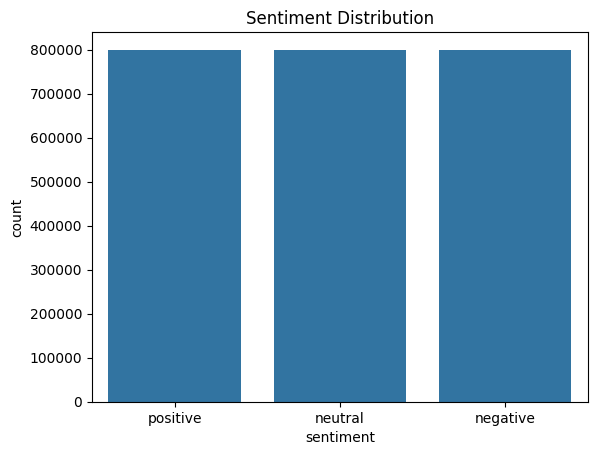

In [18]:
# First, rename the columns containing the tweet text to 'text'
negative_tweets = negative_tweets.rename(columns={negative_tweets.columns[5]: 'text'})
positive_tweets = positive_tweets.rename(columns={positive_tweets.columns[5]: 'text'})


# Label the data
negative_tweets['sentiment'] = 'negative'
neutral_tweets['sentiment'] = 'neutral'
positive_tweets['sentiment'] = 'positive'


# Keep only the `text` and `sentiment` columns
data = pd.concat([
    negative_tweets[['text', 'sentiment']],
    neutral_tweets[['text', 'sentiment']],
    positive_tweets[['text', 'sentiment']]
])

# Shuffle and reset index
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Visualize the distribution of sentiments
sns.countplot(x=data['sentiment'])
plt.title('Sentiment Distribution')
plt.show()


In [19]:
# Data Preparation
# Split data into training, validation, and test sets
train_data, temp_data = train_test_split(data, test_size=0.2, stratify=data['sentiment'], random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['sentiment'], random_state=42)

In [20]:
# Vectorize text data
vectorizer = TextVectorization(max_tokens=10000, output_sequence_length=100)
vectorizer.adapt(train_data['text'])

# Map sentiments to numerical labels
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
train_labels = train_data['sentiment'].map(label_mapping).values
val_labels = val_data['sentiment'].map(label_mapping).values
test_labels = test_data['sentiment'].map(label_mapping).values

# Prepare datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_data['text'], train_labels)).batch(32)
val_ds = tf.data.Dataset.from_tensor_slices((val_data['text'], val_labels)).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((test_data['text'], test_labels)).batch(32)

In [21]:
# Modeling
# Build a simple neural network model
model = Sequential([
    vectorizer,
    Embedding(input_dim=10000, output_dim=16),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [22]:
# Integrate TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')

In [23]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 329s 5ms/step - accuracy: 0.8006 - loss: 0.3826 - val_accuracy: 0.8576 - val_loss: 0.3033
Epoch 2/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 307s 5ms/step - accuracy: 0.8602 - loss: 0.2980 - val_accuracy: 0.8642 - val_loss: 0.2935
Epoch 3/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 299s 5ms/step - accuracy: 0.8641 - loss: 0.2915 - val_accuracy: 0.8654 - val_loss: 0.2920
Epoch 4/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 327s 5ms/step - accuracy: 0.8661 - loss: 0.2881 - val_accuracy: 0.8670 - val_loss: 0.2883
Epoch 5/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 303s 5ms/step - accuracy: 0.8675 - loss: 0.2856 - val_accuracy: 0.8678 - val_loss: 0.2876
Epoch 6/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 322s 5ms/step - accuracy: 0.8690 - loss: 0.2834 - val_accuracy: 0.8690 - val_loss: 0.2852
Epoch 7/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 323s 5ms/step - accuracy: 0.8699 - loss: 0.2816 - val_accuracy: 0.8694 - val_loss: 0.2845
Epoch 8/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 306s 5ms/step - ac

In [24]:
# Model Evaluation
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8683 - loss: 0.2836
Test Loss: 0.2826077342033386
Test Accuracy: 0.8696125149726868


In [25]:
# Generate predictions
predictions = model.predict(test_ds)
predicted_labels = np.argmax(predictions, axis=1)

# Classification Report
print(classification_report(test_labels, predicted_labels, target_names=label_mapping.keys()))

7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step
              precision    recall  f1-score   support

    negative       0.79      0.82      0.81     80000
     neutral       1.00      1.00      1.00     80000
    positive       0.82      0.79      0.80     80000

    accuracy                           0.87    240000
   macro avg       0.87      0.87      0.87    240000
weighted avg       0.87      0.87      0.87    240000



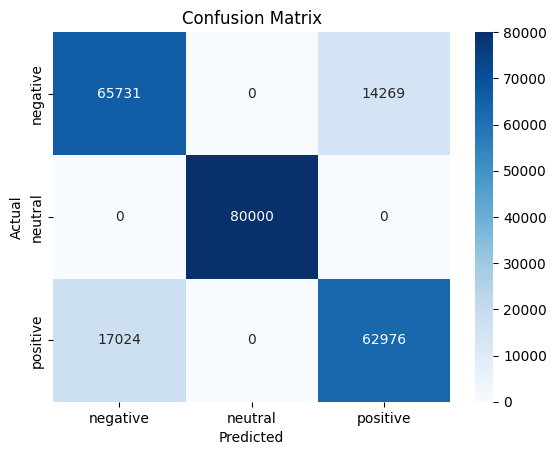

In [26]:
# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import gradio as gr
# Deployment with Gradio
# Define a Gradio interface for sentiment prediction
def predict_sentiment(text):
    text_array = tf.convert_to_tensor([text])
    prediction = model.predict(text_array)
    sentiment = list(label_mapping.keys())[np.argmax(prediction)]
    return sentiment

gr_interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=2, placeholder='Enter tweet text here...'),
    outputs='text',
    title='Sentiment Analysis'
)

# Launch the Gradio app
gr_interface.launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://e2a53d6e1a140f8d0b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
